## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

Specifically, the following skills will be reinforced in a real-world-ish simulated setting:

For linear regression:
* Handling categorical features in a `sklearn` model.
* Carrying out a train-test-split.
* Training a model.
* Evaluating that model on the testing data.

For k-Nearest Neighbors:
* Preparing your data for modeling.
* Scaling your data.
* Tuning a tuning parameter using k-Fold Cross Validation.
* Finally selecting a model based on a tuning parameter.
* Making model-based decisions on new data.

## Imports

In [3]:
# Import everything you need for this project here.
# You will want to return to this cell to import more things later in the project.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important in this class!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Part 1: Regression on MPG Data

## Read Data
The `mpg` dataset is the fuel economy for 38 popular models of car between 1999 and 2008

In [6]:
# Read in the mpg data in the data folder in this repository.
mpg_df = pd.read_csv('data/mpg.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [8]:
mpg_df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [9]:
mpg_df.isnull().value_counts()

manufacturer  model  displ  year   cyl    trans  drv    cty    hwy    fl     class
False         False  False  False  False  False  False  False  False  False  False    234
dtype: int64

<AxesSubplot:>

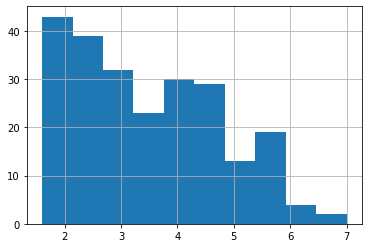

In [10]:
mpg_df.displ.hist()

In [11]:
mpg_df.fl.value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

## Dummify the `drv` Variable

In [12]:
drv_dum = pd.get_dummies(mpg_df.drv, prefix='drv')

In [13]:
# Dropping one column to make All-Wheel-Drive our intercept value

drv_dum.drop(drv_dum.columns[0], axis=1, inplace=True)

In [14]:
mpg_df = pd.concat([mpg_df,drv_dum], axis=1)

In [15]:
mpg_df.drop(mpg_df.columns[6], axis=1, inplace=True)

In [16]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,drv_f,drv_r
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,1,0
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,1,0
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,1,0
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,1,0
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),19,28,p,midsize,1,0
230,volkswagen,passat,2.0,2008,4,manual(m6),21,29,p,midsize,1,0
231,volkswagen,passat,2.8,1999,6,auto(l5),16,26,p,midsize,1,0
232,volkswagen,passat,2.8,1999,6,manual(m5),18,26,p,midsize,1,0


In [17]:
fl_dum = pd.get_dummies(mpg_df.fl, prefix='fl')

In [18]:
fl_dum.drop(fl_dum.columns[0], axis=1, inplace=True)

In [19]:
fl_dum

,fl_d,fl_e,fl_p,fl_r
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
229,0,0,1,0
230,0,0,1,0
231,0,0,1,0
232,0,0,1,0


In [20]:
mpg_df = pd.concat([mpg_df,fl_dum], axis=1)

In [21]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,drv_f,drv_r,fl_d,fl_e,fl_p,fl_r
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,1,0,0,0,1,0
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,1,0,0,0,1,0
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,1,0,0,0,1,0
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,1,0,0,0,1,0
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),19,28,p,midsize,1,0,0,0,1,0
230,volkswagen,passat,2.0,2008,4,manual(m6),21,29,p,midsize,1,0,0,0,1,0
231,volkswagen,passat,2.8,1999,6,auto(l5),16,26,p,midsize,1,0,0,0,1,0
232,volkswagen,passat,2.8,1999,6,manual(m5),18,26,p,midsize,1,0,0,0,1,0


## Split your data into train/test data
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

**NOTE:** When doing your train/test split, please use random seed 123.

In [22]:
variables = ['drv_f', 'drv_r', 'displ']
X = mpg_df[variables]
y = mpg_df.hwy

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Fit a Linear Regression model predicting Highway MPG
You must use exactly these two variables: `displ` and `drv`.

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. How did your model do? Is it overfit, underfit, or neither?

In [26]:
print('Train R^2:', lr.score(X_train, y_train))
print('Test R^2:', lr.score(X_test, y_test))

Train R^2: 0.7417563476702473
Test R^2: 0.6873756826335679


In [27]:
from sklearn.metrics import mean_squared_error

print('Train MSE=', mean_squared_error(y_train, lr.predict(X_train)))
print('Test MSE=', mean_squared_error(y_test, lr.predict(X_test)))

Train MSE= 9.787253125713136
Test MSE= 8.321141482697328


# Part 2: Classification using KNN

## Read in the Diamonds data
This is data regarding 50,000 round cut diamonds.

In [4]:
diam_df = pd.read_csv('data/diamonds.csv')

## Explore the data

In [5]:
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
diam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diam_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
diam_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Filter your data
Filter your data to only contain diamonds of cuts "Ideal" and "Good"

In [9]:
diam_df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
filt_df = diam_df[(diam_df['cut'] == 'Good') | (diam_df['cut'] == 'Ideal')]

In [11]:
filt_df.cut.value_counts()

Ideal    21551
Good      4906
Name: cut, dtype: int64

## Prepare your X, y matrices
Construct an `X` matrix using **all numeric columns** from the diamond data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

In [12]:
filt_df['cut_vals'] = filt_df.cut.map({'Good':0, 'Ideal':1})

<ipython-input-12-273425acf4c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['cut_vals'] = filt_df.cut.map({'Good':0, 'Ideal':1})


In [13]:
filt_df.cut_vals.value_counts()

1    21551
0     4906
Name: cut_vals, dtype: int64

In [14]:
vbls = ['carat', 'depth', 'price', 'table', 'x', 'y', 'z']

X = filt_df[vbls]
y = filt_df.cut_vals

X

,carat,depth,price,table,x,y,z
0,0.23,61.5,326,55.0,3.95,3.98,2.43
2,0.23,56.9,327,65.0,4.05,4.07,2.31
4,0.31,63.3,335,58.0,4.34,4.35,2.75
10,0.30,64.0,339,55.0,4.25,4.28,2.73
11,0.23,62.8,340,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...
53927,0.79,58.1,2756,59.0,6.06,6.13,3.54
53929,0.71,61.4,2756,56.0,5.76,5.73,3.53
53935,0.72,60.8,2757,57.0,5.75,5.76,3.50
53936,0.72,63.1,2757,55.0,5.69,5.75,3.61


## Scale your X matrix using a Standard Scaler

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
lr = LinearRegression()

In [150]:
X = scaler.fit_transform(X)

## Why did we just do that?
In the cell below, give a 2-3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

In [120]:
# Since our variables have very different ranges, we scaled the X matrix so that
# they will not be unevenly penalized in the errors that they generate.
# The scaler puts the errors in terms of each variable's standard deviation.

## k-Nearest Neighbors
You're going to fit a kNN model here, but you first need to tune your model to find the best value of $k$. Loop through the suggested values of $k$ and select the value that produces the best model with respect to **5-fold cross-validation**.


**IMPORTANT:** Do not use _any_ code copy and pasted directly from lecture! Typing things out yourself is 100% essential to the learning process here. It's ok to use the exact same strategies used in class, just _please please please_ type it our yourself!

**IMPORTANT 2:** Make sure your 5-fold CV is selecting folds randomly (ie, `shuffle=True`)

In [151]:
# Loop through the values of k in range(1, 51)
# NOTE: This could take several minutes on your computer! Make sure you have all of your
# code correct before running the cell. If you're unsure, test your code on a smaller 
# array of ks first.

k_scores = []

for k in range (1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    score = cross_val_score(knn, X, y, cv=5).mean()
    k_scores.append([k, score])
    
k_scores

[[1, 0.8685882971597257],
 [2, 0.864544971687829],
 [3, 0.893116464545036],
 [4, 0.8897909183623469],
 [5, 0.9029049029049029],
 [6, 0.9015823587252159],
 [7, 0.9089140089140088],
 [8, 0.9078181435324293],
 [9, 0.9147719504862362],
 [10, 0.9136760493903351],
 [11, 0.9190425404711119],
 [12, 0.9177198391484106],
 [13, 0.9231619088761948],
 [14, 0.9218392075534932],
 [15, 0.9259207330635902],
 [16, 0.9251649680221108],
 [17, 0.9279615351043923],
 [18, 0.9267521624664482],
 [19, 0.93004008004008],
 [20, 0.9294354580068867],
 [21, 0.9315895601609887],
 [22, 0.9311739168882026],
 [23, 0.9329122471979616],
 [24, 0.9322698608412894],
 [25, 0.9340082197225055],
 [26, 0.9331390331390331],
 [27, 0.9338569695712554],
 [28, 0.9332901047186761],
 [29, 0.9342726414154987],
 [30, 0.9344617273188701],
 [31, 0.9347261204404061],
 [32, 0.9346884204027062],
 [33, 0.9352551638265924],
 [34, 0.9348017205160062],
 [35, 0.9353684996542139],
 [36, 0.9348772277343708],
 [37, 0.9356330142044428],
 [38, 0.935746

In [152]:


def max_value(my_list):
    return max([sublist[-1] for sublist in my_list])

print (max_value(k_scores))

for i in range (0, len(k_scores)):
    if k_scores[i][1]==max_value(k_scores):
        print(k_scores[i])

#best k-value: 18

0.9368800083085798
[49, 0.9368800083085798]


## Produce the plot of tuning parameter (k) vs Accuracy
What is the "best" value of k?

In [153]:
k_vals = list(zip(*k_scores))[0]
k_score = list(zip(*k_scores))[1]

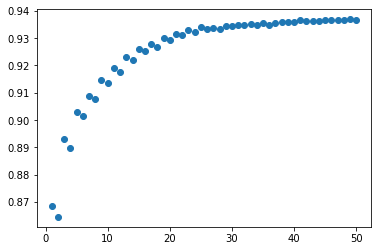

In [154]:
plt.scatter(k_vals, k_score)

## Produce the Best kNN Model
Now that you know the optimal value of k, fit a kNN on the full (but still filtered to "Ideal" and "Good" cuts)

In [156]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X, y)
score = cross_val_score(knn, X, y, cv=5).mean()

score

0.9368800083085798

## Does this model outperform the baseline?

In [159]:
#Baseline:
print('baseline value:',21551/(21551+4906))
print('our score:', score)

# yes, the model outperforms the baseline

baseline value: 0.8145670332993159
our score: 0.9368800083085798


## Prediction
Suppose I have a diamond with the following specifications:

In [160]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60,
    'table': 64,
    'price': 400,
    'x': 3,
    'y': 3,
    'z': 3
}, index=[0])

What do you predict the cut of this diamond to be?

**BIG HINT:** Don't forget to scale this new data point appropriately!

In [163]:
sc_new_diamond = scaler.transform(new_diamond)

knn.predict(sc_new_diamond)

array([0], dtype=int64)

# (BONUS) Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ diamonds data set, produce a **logistic regression** model that achieves the best randomzied 20-fold cross validation. Note that for this problem, you are doing multi-class classification. The response variable has _five_ categories.